<a href="https://colab.research.google.com/github/Tuevu110405/Module4-Linear_regression/blob/feature%2Flinear-w2/week2_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np

data = np.genfromtxt('advertising.csv', delimiter=  ',', skip_header = 1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3]

#Normalize input data
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg)/(maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg


X_b , maxi , mini , avg = mean_normalization(X)
print(X_b)
print(N)

[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01 -1.14890351e-01 -7.06933198e

In [11]:
def stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.00001 ):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]



            #Compute output
            y_hat = np.dot(xi, thetas)

            #Compute loss li
            loss = (y_hat - yi)*(y_hat - yi)/2
            loss = loss.reshape(1,1)

            #Compute gradient for loss
            gradient = np.dot(xi.T, (y_hat - yi))


            #Update thetas
            thetas = thetas - learning_rate*gradient

            #logging
            thetas_path.append(thetas)
            losses.append(loss)

    return thetas_path, losses


(10001, 4, 1)
(10000, 1, 1)
<class 'list'>


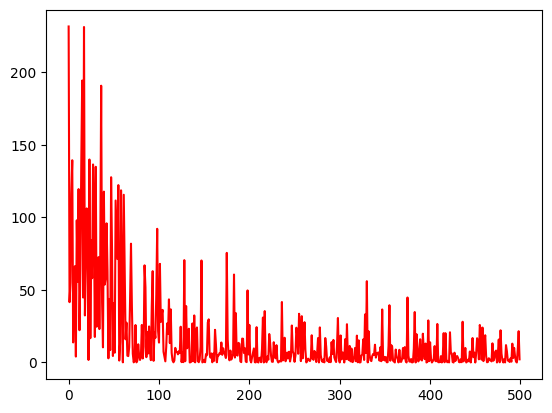

In [12]:
import matplotlib.pyplot as plt

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs= 50, learning_rate= 0.01)
print(np.shape(sgd_theta))
print(np.shape(losses))
print(type(losses))

x_axis = list(range(500)) # Change 1: Make x_axis the same length as losses

# Change 2: Extract the loss values from the numpy arrays and flatten the list
losses_flattened = [loss.item() for loss in losses]

plt.plot(x_axis, losses_flattened[:500], color = 'r') # Change 3: Use losses_flattened for plotting
plt.show()

In [13]:
sgd_theta , losses = stochastic_gradient_descent( X_b , y , n_epochs =1 , learning_rate = 0.01)
print(round(np.sum(losses), 2))

6754.64


In [25]:
def mini_batch_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.01, minibatch_size= 20 ):
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
[0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        #shuffled_indices = np.random.permutation(N) #for real application
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
    132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
    185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
    165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
    169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
    77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
    195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
    92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
    174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
    129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
    168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
    133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
    154])
        x_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = x_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            #Compute output
            y_hat = np.dot(xi, thetas)

            #compute lose
            loss = (y_hat - yi).dot(y_hat - yi)/minibatch_size

            #compute derivative of loss
            gradient = np.dot(xi.T, (y_hat - yi))/minibatch_size

            #update parameters
            thetas = thetas - learning_rate*gradient
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses




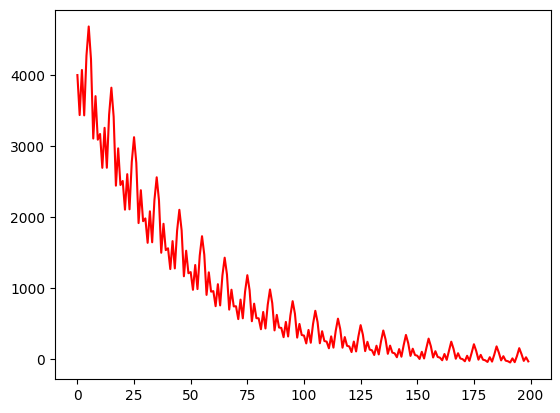

In [26]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01, minibatch_size=20)

x_axis = list(range(200))
losses_flattened = [loss.item() for loss in losses]

plt.plot(x_axis, losses_flattened[:200], color='r')
plt.show()

In [27]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print(round(sum(losses) ,2))


172982.9


In [42]:
def batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate = 0.01):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        #compute output
        y_hat = np.dot(X_b, thetas)

        #compute loss
        loss = np.sum((y_hat - y)*(y_hat - y))/ N

        #compute derivative of loss
        gradient = 2*np.dot(X_b.T, (y_hat - y))/N

        #update parameters
        thetas = thetas - learning_rate*gradient
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

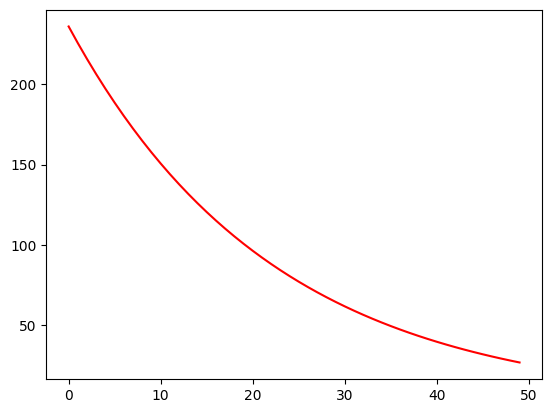

In [44]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

# The x_axis should have the same length as the number of losses, which is
# the number of epochs + 1 (because thetas are initialized before the loop)
x_axis = list(range(len(losses)))  # Changed to match len(losses) which is 51 here

losses_flattened = [loss.item() for loss in losses]

# Plot using the entire losses_flattened list
plt.plot(x_axis, losses_flattened, color='r')
plt.show()

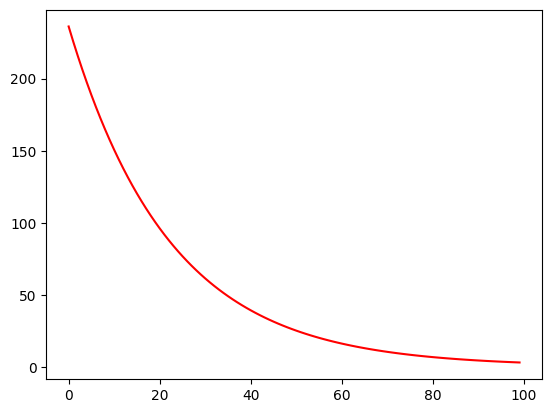

In [45]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100)) # Use len(losses) to get correct x-axis range

losses_flattened = [loss.item() for loss in losses]

plt.plot(x_axis, losses_flattened[:100], color='r') # Use losses_flattened directly
plt.show()

In [46]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print(round(sum(losses),2))

5347.82


Bitcoin assignment

In [48]:
# prompt: tải file csv từ đường link: https://drive.google.com/file/d/1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q/view

!wget https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q -O BTC-Daily.csv


--2024-10-13 15:15:21--  https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
Resolving drive.google.com (drive.google.com)... 74.125.69.138, 74.125.69.113, 74.125.69.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.69.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q [following]
--2024-10-13 15:15:21--  https://drive.usercontent.google.com/download?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.202.132, 2607:f8b0:4001:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257469 (251K) [application/octet-stream]
Saving to: ‘BTC-Daily.csv’

BTC-Daily.csv       100%[===================>] 251.43K  --.-KB/s    in 0.003s  

2024-10-13 15:15:23 (92.2 MB/s) - ‘BT

In [49]:
#Load dataset
import pandas as pd

df = pd.read_csv('BTC-Daily.csv')


df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df['date'].dtypes

dtype('O')

In [50]:
import matplotlib.pyplot as plt

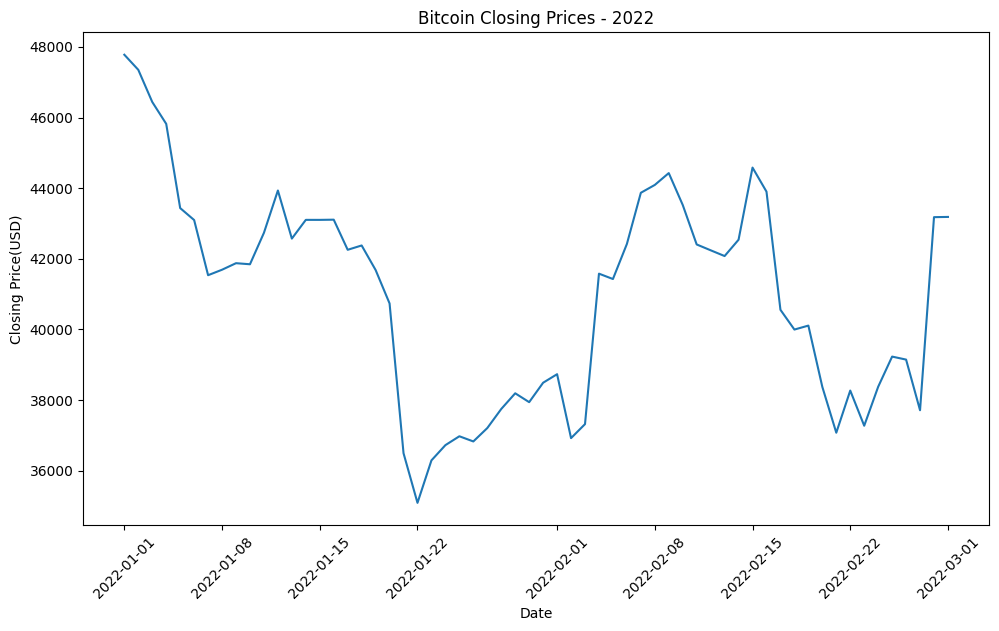

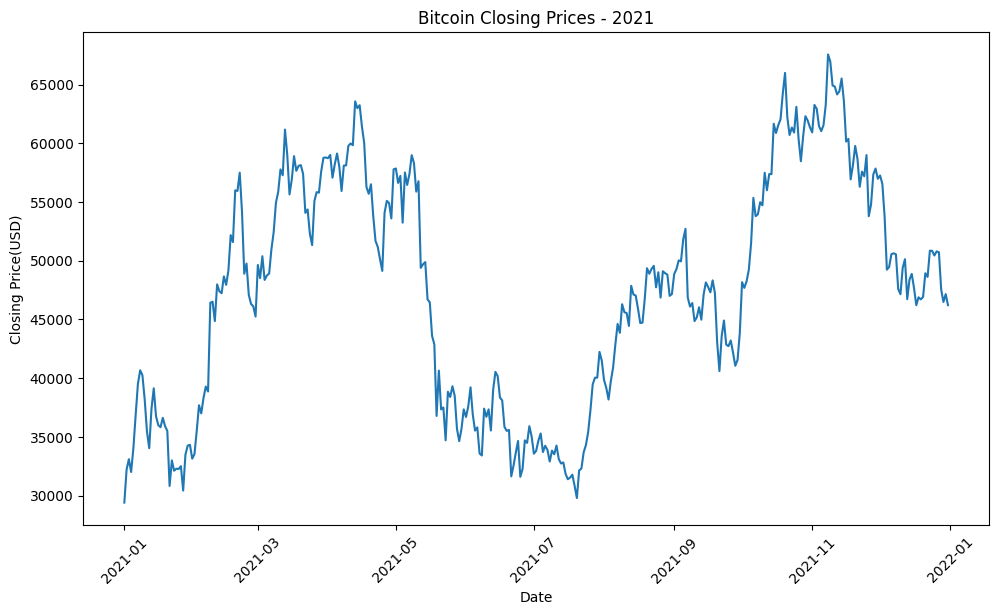

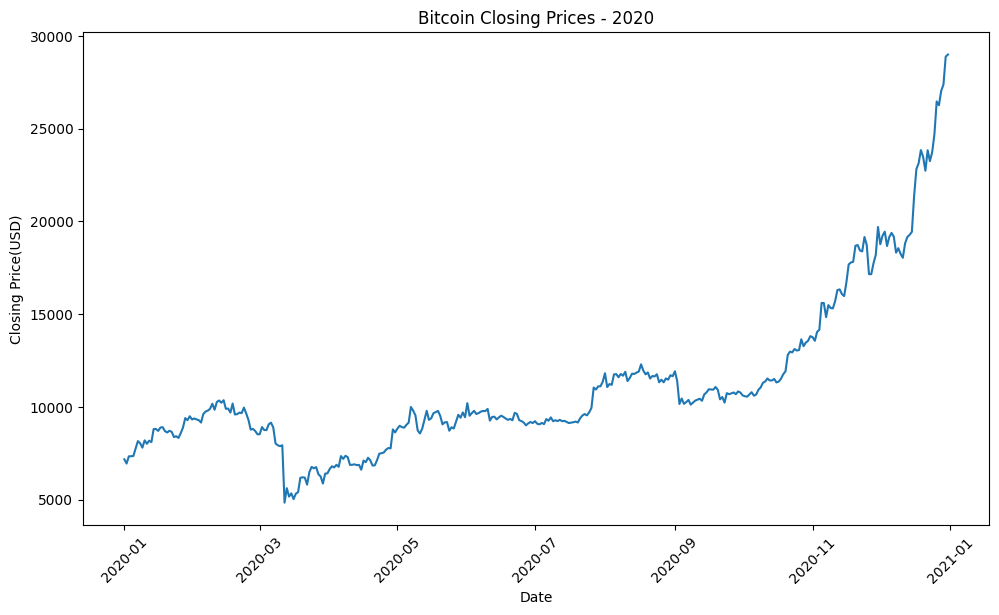

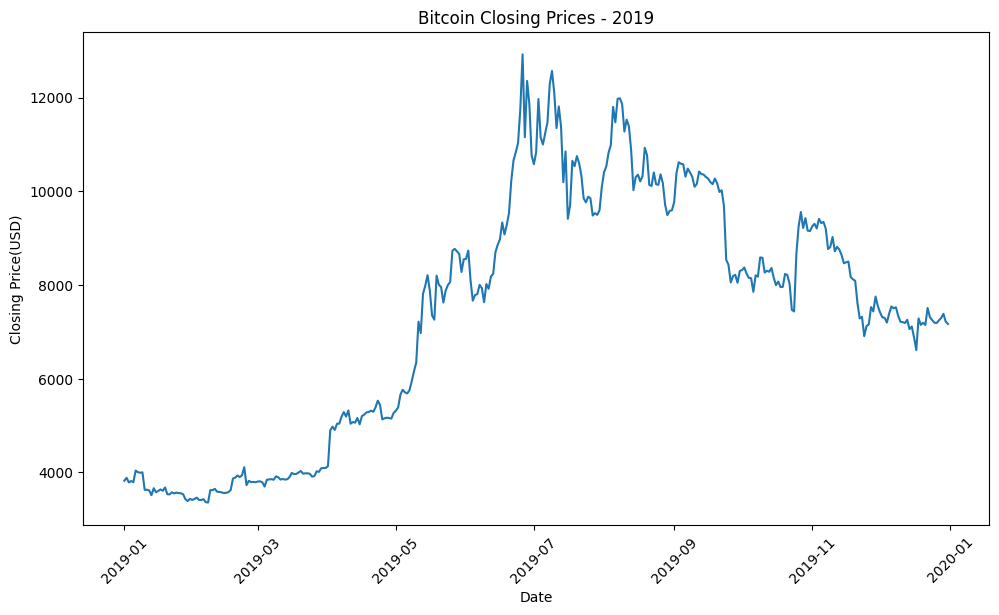

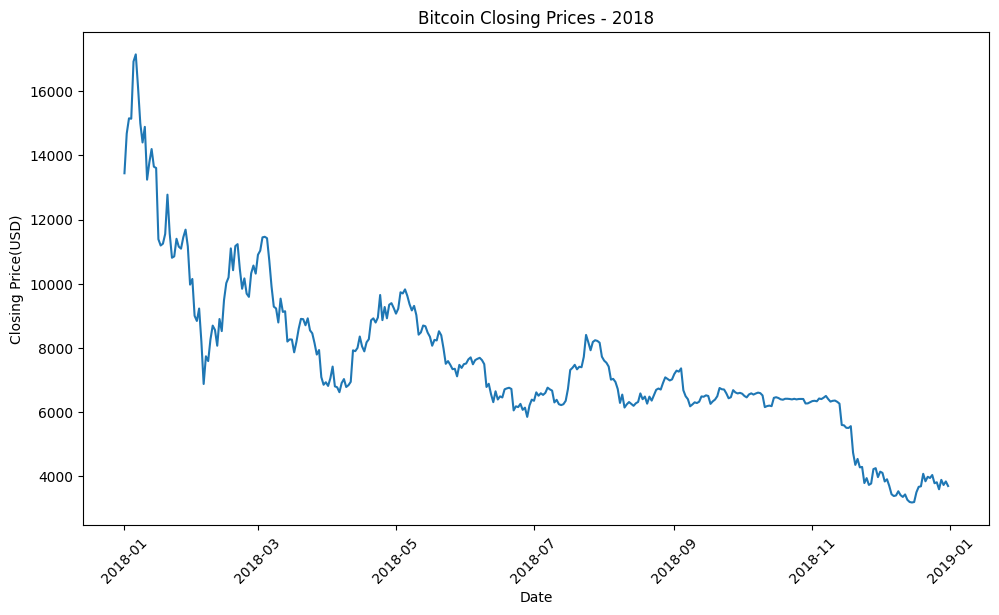

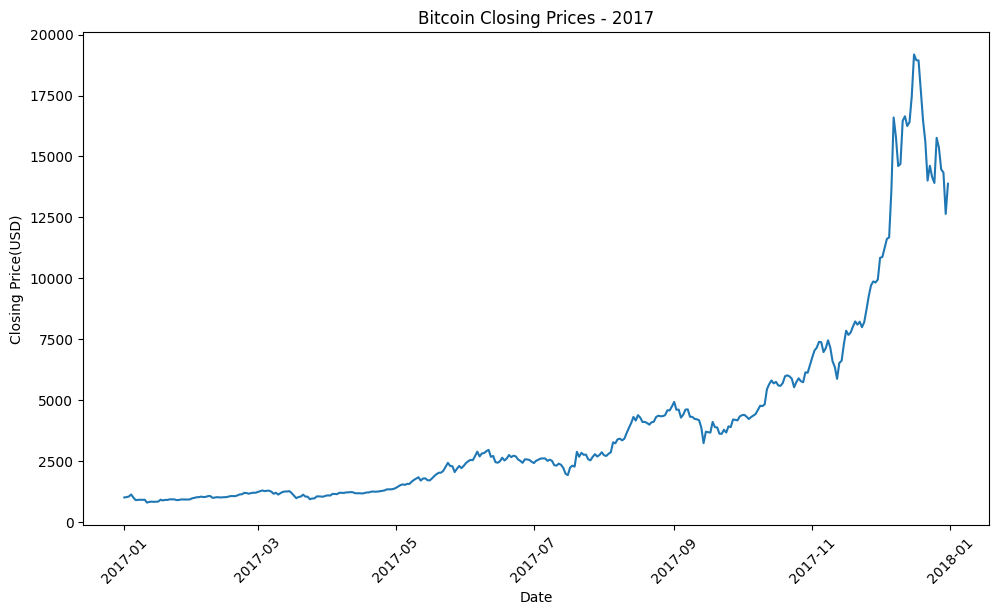

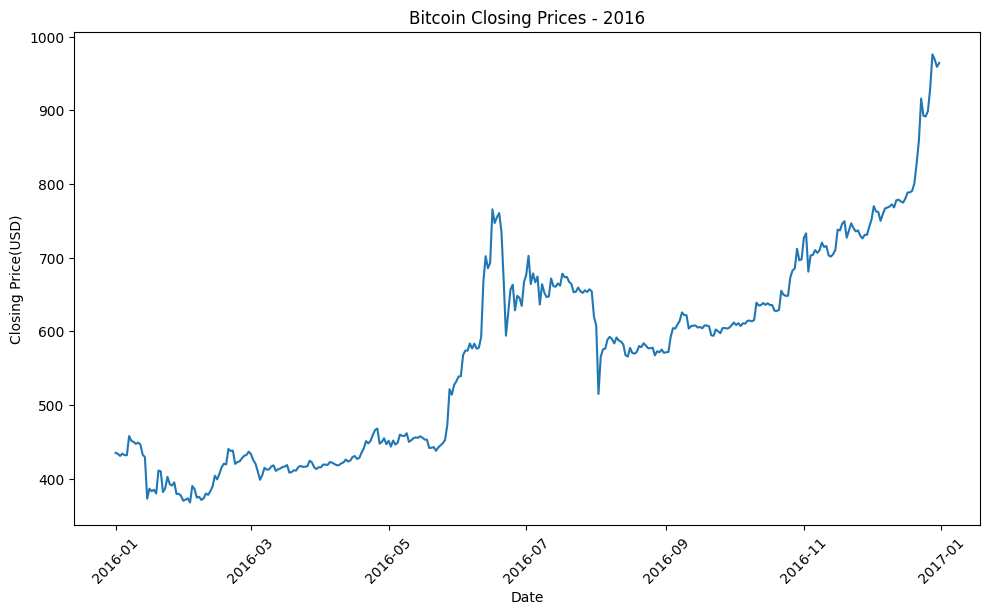

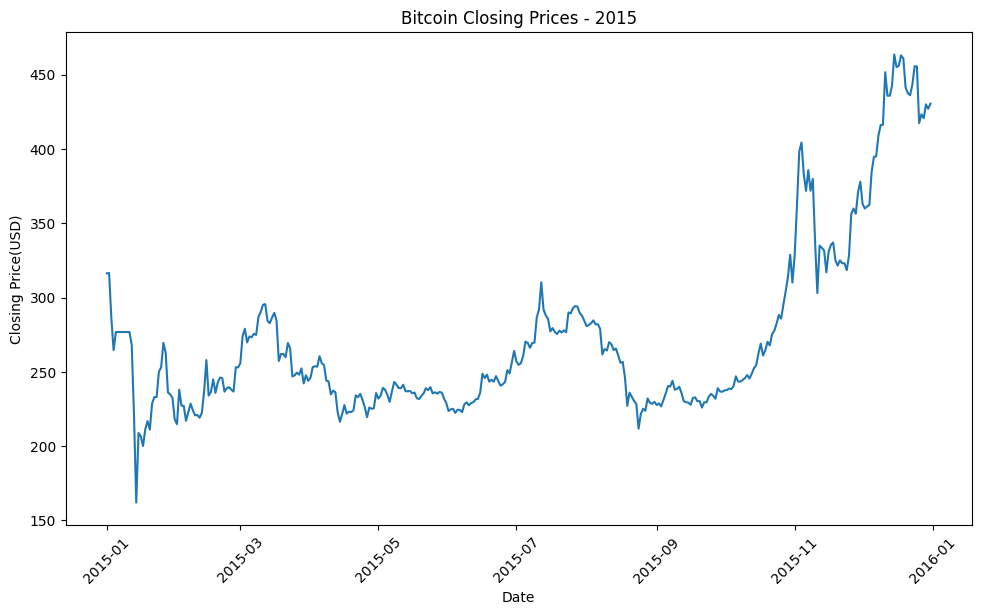

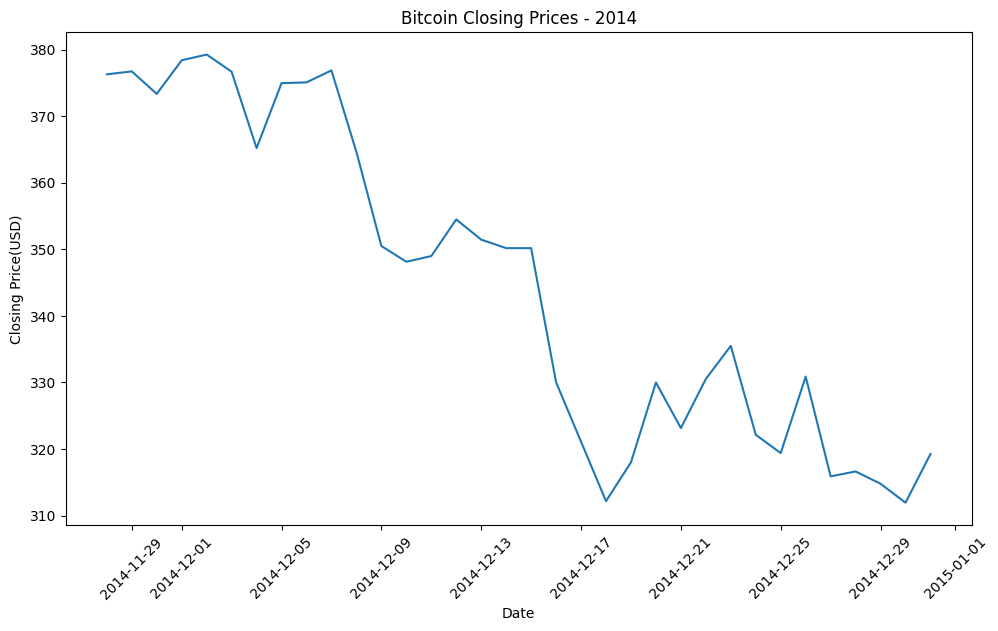

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BTC-Daily.csv')
df = df.drop_duplicates()

# Change the format string to include time information
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
# or format='%Y-%m-%d %I:%M:%S %p' if time is in 12-hour format with AM/PM

# If the date formats are mixed, let pandas infer the format:
# df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

unique_years = df['date'].dt.year.unique()

# Plot the value of bitcoin each year
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    plt.figure(figsize=(10, 6))
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price(USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(year_data['date'], year_data['close'], label=f'{year}')
    plt.show()

In [53]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


<ipython-input-54-1260fa339319>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


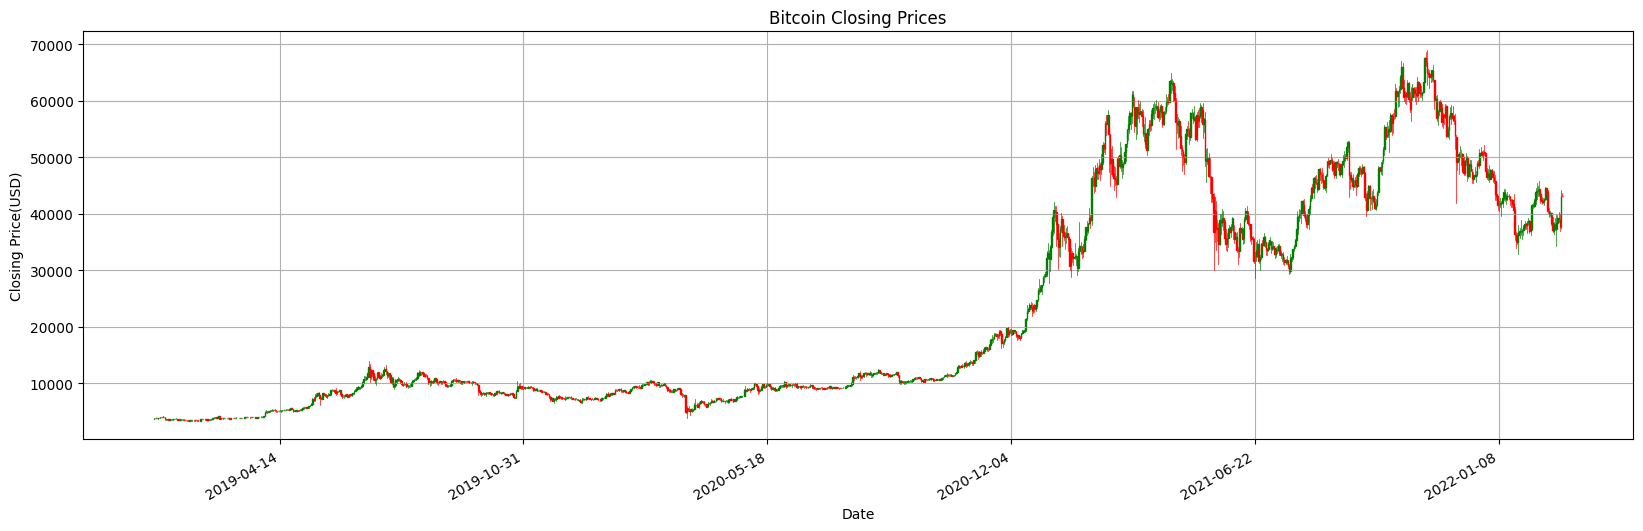

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

#convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

#Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high','low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price(USD)')
plt.grid(True)

plt.savefig('bitcoin_candlestick_2019_2020.pdf')

plt.show()



In [58]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

In [61]:
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

In [62]:
def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)


In [63]:
X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

print(X)

       NumericalDate  Standardized_Open_Prices  Standardized_High_Prices  \
0     20220301000000                  1.937893                  1.887415   
1     20220228000000                  1.599553                  1.925034   
2     20220227000000                  1.687421                  1.663971   
3     20220226000000                  1.693320                  1.690505   
4     20220225000000                  1.639126                  1.654474   
...              ...                       ...                       ...   
2646  20141202000000                 -0.695461                 -0.696442   
2647  20141201000000                 -0.695584                 -0.696475   
2648  20141130000000                 -0.695573                 -0.696494   
2649  20141129000000                 -0.695583                 -0.696218   
2650  20141128000000                 -0.696371                 -0.696532   

      Standardized_Low_Prices  
0                    2.029161  
1                    1.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)



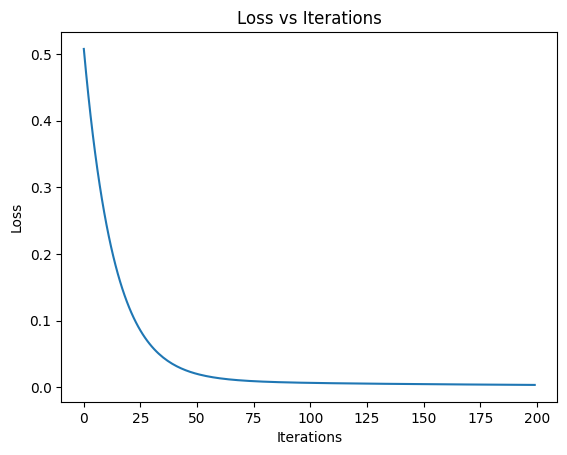

In [65]:
import numpy as np

def linear_regression_vectorized(X, y, learning_rate = 0.01, num_iterations = 200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for i in range(num_iterations):

        y_hat = predict(X , w , b )
        dw , db , cost = gradient( y_hat , y , X )
        w , b = update_weight(w , b , learning_rate , dw , db )
        losses.append(cost)

    return w , b , losses

w, b, losses = linear_regression_vectorized(X_train, y_train, learning_rate=0.01, num_iterations=200)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

In [66]:
from sklearn.metrics import r2_score

#Make predictions on the test set
y_pred = predict(X_test, w, b)

#Calculate Rmse
rmse = np.sqrt(np.mean((y_pred - y_test)**2))

#Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

#Calculate MAPE
mape = np.mean(np.abs((y_pred - y_test)/y_test))*100

#Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
r2_train = r2_score(y_train, y_train_pred)

#Calculate R-squared on test data
r2_test = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)
print('R-squared on training data:', r2_train)
print('R-squared on test data:', r2_test)



RMSE: 0.07906215758276405
MAE: 0.06533510684569414
MAPE: 53.68734850701921
R-squared on training data: 0.9933922792609646
R-squared on test data: 0.9935177776507007


<ipython-input-68-75bae4b932f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


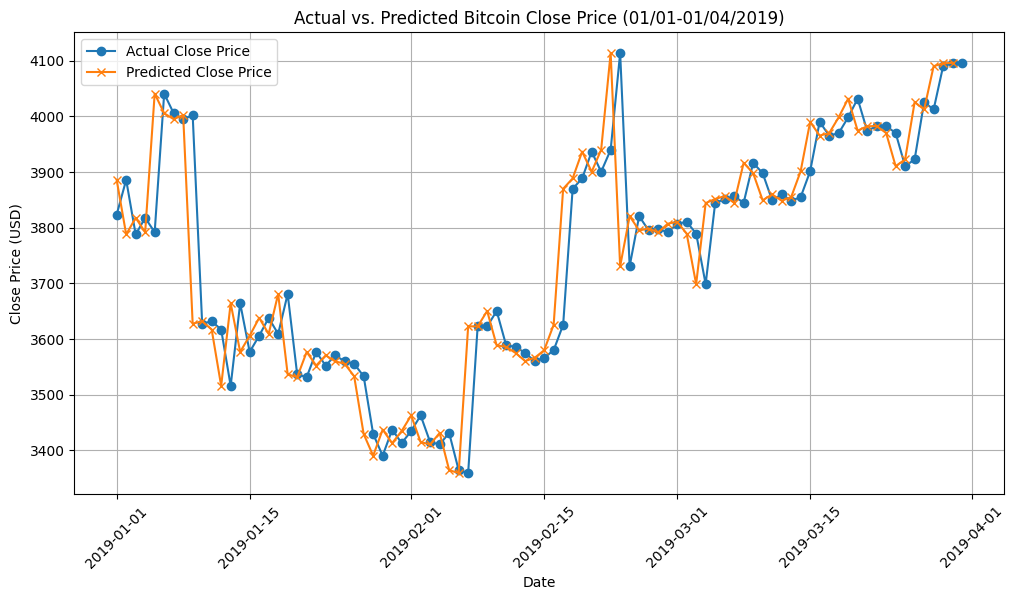

In [68]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()